In [148]:
#June 6

import ares
import numpy as np
import matplotlib.pyplot as pl
# from ..physics.Constants import 

In [149]:
pop_halo = ares.populations.HaloPopulation()
data = ares.analysis.GalaxyPopulation() #for lit values

Specific Star Formation Rates - dependant on galaxy mass  
Whitaker2014

In [4]:
#[a, b, c] - from Table 1
polyPara = [[-27.4, -26.03, -24.04, -19.99], [5.02, 4.62, 4.17, 3.44], [-0.22, -0.19, -0.16, -0.13]]
#4.1. Polynomial
def polyFit(z, mass):
    if 0.5 <= z < 1.0:
        i = 0
    elif 1.0 <= z < 1.5:
        i = 1
    elif 1.5 <= z < 2.0:
        i = 2
    elif 2.0 <= z < 2.5:
        i = 3
    else:
        print("Out of redshift range")
        return 0        
    
    return polyPara[0][i] + polyPara[1][i]*np.log10(mass) + polyPara[2][i]*(np.log10(mass))**2 #Equ 2

#From Table 3
b = [1.11, 1.31, 1.49, 1.62]
def pl_HL(z, mass):
    if 0.5 <= z < 1.0:
        i = 0
    elif 1.0 <= z < 1.5:
        i = 1
    elif 1.5 <= z < 2.0:
        i = 2
    elif 2.0 <= z < 2.5:
        i = 3
    else:
        print("Out of redshift range")
        return 0        
    
    alpha_L = 0.95 + 0.02*z
    alpha_H = 0.03 + 0.31*z #Equ 4
        
    a = []
    for m in mass:
        if m <= 10**10.2:
            a.append(alpha_L)
        else:
            a.append(alpha_H)
    
    return a*(np.log10(mass)-10.2) + b[i] #Equ 3

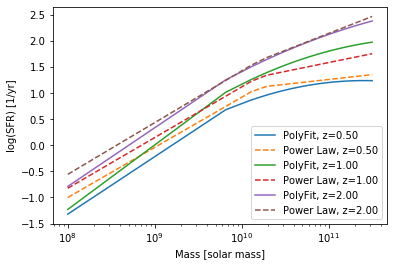

In [5]:
Sm = np.linspace(10**8.0, 10**11.5)

for z in [0.5, 1, 2]:
    SFR_P = polyFit(z, Sm)
    # print(SFR)
    SFR_pl = pl_HL(z, Sm)

    pl.semilogx(Sm, SFR_P, label="PolyFit, z=%.2f" %z)
    pl.semilogx(Sm, SFR_pl, label="Power Law, z=%.2f" %z, ls="--")

pl.legend()
pl.ylabel('log(SFR) [1/yr]')
pl.xlabel('Mass [solar mass]')
# pl.title('')

# pl.ylim(1e-25, 10)
pl.show()

In [51]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value
import scipy.integrate as integrate

cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)

# z_at_value(cosmo.age, 0.5 * u.Gyr)

### Main Sequence: stellar mass vs. SFR relationship  
Speagle2014 - using a compilation of 25 studies from literature  
5.1 The Evolution of the Galaxy “Main Sequence”

In [142]:
"""
The interpublication scatter around this fit is σi = (0.08, 0.09, 0.11) dex, for the minimum, median, and maximum 
values within the fitted mass range logM∗ = 9.7 – 11.1, respectively. This encompasses a majority of the age of 
the Universe (z ∼ 0.25 – 2.75), and provides good fits to the observed SFRs all the way out z ∼ 5

If redshift=True (default) age is given in redshift, else it should be in Gyr
"""
def phi(age, mass, redshift=True):
    if redshift:
        t = cosmo.age(age).value
    else:
        t = age

    # t: age of universe in Gyr

    if t < cosmo.age(6).value: # if t > z=6
        print("Warning, age out of well fitting zone of this model.")
#     print(mass)
    return (0.84-0.026*t)*np.log10(mass) - (6.51-0.11*t) #Equ 28


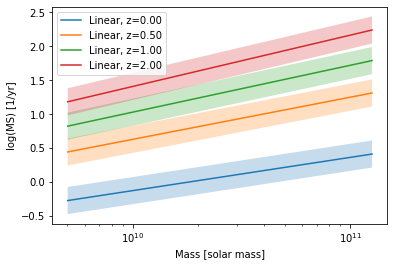

In [109]:
Sm = np.linspace(10**9.7, 10**11.1)

for z in [0, 0.5, 1, 2]:
    SFR = phi(z, Sm)
    error = np.ones(len(SFR)) * 0.2 #dex #the stated "true" scatter

    pl.semilogx(Sm, SFR, label="Linear, z=%.2f" %z)
    pl.fill_between(Sm, SFR-error, SFR+error, alpha=0.25)

pl.legend()
pl.ylabel('log(MS) [1/yr]')
pl.xlabel('Mass [solar mass]')
# pl.title('')

pl.show()

z = np.linspace(.1, 4, 100)

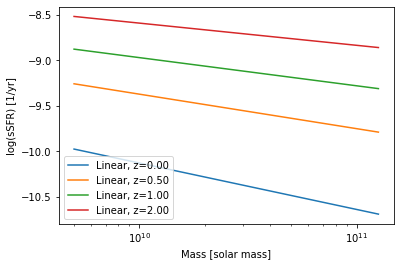

In [14]:
#specific star formation rate?
Sm = np.linspace(10**9.7, 10**11.1)

for z in [0, 0.5, 1, 2]:
    SFR = np.log10( 10**phi(z, Sm)/Sm )
    error = np.ones(len(SFR)) * 0 #gotta do some error propogation here

    pl.semilogx(Sm, SFR, label="Linear, z=%.2f" %z)
    pl.fill_between(Sm, SFR-error, SFR+error, alpha=0.25)

pl.legend()
pl.ylabel('log(sSFR) [1/yr]')
pl.xlabel('Mass [solar mass]')
# pl.title('')

pl.show()

z = np.linspace(.1, 4, 100)

In [40]:
dunne = {
    0.5: {'M': [9.3229011E+08, 2.3418069E+09, 5.8823529E+09, 1.4775803E+10, 2.9481602E+10, 5.8823529E+10],
        'phi': [-9.52287874528034, -9.52287874528034, -9.60205999132796, -9.69897000433602, -9.76955107862172, -9.82390874094432],
        'err': [(0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3)]
       },
     0.95: {'M': [3.7115138E+09, 5.8823529E+09, 1.4775803E+10, 2.9481602E+10, 7.4054436E+10],
        'phi': [-9.0, -9.09691001300805, -9.15490195998574, -9.22184874961636, -9.15490195998574],
        'err': [(0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3)]
       },
     1.4: {'M': [4.6725190E+09, 9.3229011E+09, 1.4775803E+10, 2.9481602E+10, 7.4054436E+10],
        'phi': [-8.69897000433602, -8.74472749489669, -8.79588001734407, -8.82390874094432, -8.85387196432176],
        'err': [(0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3)]
       },
     1.85: {'M': [9.3229011E+09, 1.4775803E+10, 3.3078901E+10, 7.4054436E+10],
        'phi': [-8.39794000867204, -8.45593195564972, -8.52287874528034, -8.52287874528034],
        'err': [(0.3, 0.3), (0.3, 0.3), (0.3, 0.3), (0.3, 0.3)]
        },
}

feulner = {
    0.5: {'M': list(10**np.arange(9.0, 12.000, 1.000)),
    'phi': [-8.6, -9.2, -10.1],
    'err': [(0.4, 0.4), (0.4, 0.4), (0.4, 0.4)]
         }
}
karim = {
0.49: {'M': [1.1220185E+10, 2.1877616E+10, 4.3651583E+10, 8.3176377E+10, 1.7782794E+11],
    'phi': [-9.5, -9.7, -9.95, -10.15, -10.5],
    'err': [(0.301029995663981, 0.301029995663981), (0.301029995663981, 0.301029995663981), (0.301029995663981, 0.301029995663981), (0.301029995663981,
           0.301029995663981), (0.3, 0.3)]
      }
}


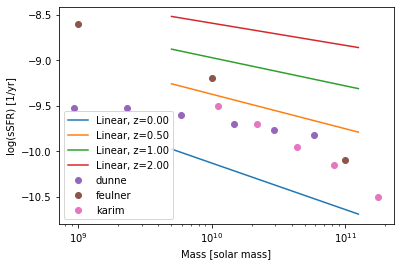

In [71]:
#specific star formation rate?
Sm = np.linspace(10**9.7, 10**11.1)

for z in [0, 0.5, 1, 2]:
    SFR = np.log10( 10**phi(z, Sm)/Sm )
    error = np.ones(len(SFR)) * 0 #gotta do some error propogation here

    pl.semilogx(Sm, SFR, label="Linear, z=%.2f" %z)
    pl.fill_between(Sm, SFR-error, SFR+error, alpha=0.25)

pl.semilogx(dunne[0.5]['M'], dunne[0.5]['phi'], label="dunne", ls="", marker="o")
pl.semilogx(feulner[0.5]['M'], feulner[0.5]['phi'], label="feulner", ls="", marker="o")
pl.semilogx(karim[0.49]['M'], karim[0.49]['phi'], label="karim", ls="", marker="o")

# pl.fill_between(dunne[0.5]['M'], dunne[0.5]['phi']-0.3, dunne[0.5]['phi']+0.3, alpha=0.25)

pl.legend()
pl.ylabel('log(sSFR) [1/yr]')
pl.xlabel('Mass [solar mass]')
# pl.title('')

pl.show()

z = np.linspace(.1, 4, 100)

Cosmic SFR density (SFRD) hopefully one day  
SFRD(z) = sum(SFR(z,Mh) * nh(z, Mh))

In [131]:
import GalaxyHOD

In [167]:
#for each mass, get sfr (sSFR) * number density of that mass
# then 'integrate' over all the masses

pop = GalaxyHOD.GalaxyHOD()
bins = np.logspace(9.5, 11.5)

Zs = np.linspace(0, 5, 50)
inter = []

for z in Zs:
    numberD = pop.StellarMassFunction(z, bins) #need to add an option to suppress the message

    SFR = 10**phi(z, bins)/bins # cause we don't want the value loged i think?

    dbin = [] #does this get the right bins?
    for i in range(0, len(bins) - 1):
        dbin.append(bins[i+1]-bins[i])

    SFRD = np.sum( numberD[:-1] * SFR[:-1] * dbin )
    
#     print(SFRD)
    inter.append(SFRD)

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating
Interpolating


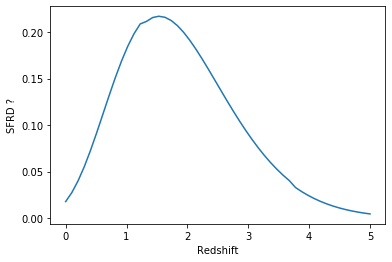

In [168]:
# print(len(inter))

pl.plot(Zs, inter)
# pl.legend()
pl.ylabel('SFRD ?')
pl.xlabel('Redshift')
# pl.title('')

pl.show()